              precision    recall  f1-score   support

           0       0.31      0.22      0.26       118
           1       0.00      0.00      0.00        19
           2       0.74      0.89      0.81       358
           3       0.00      0.00      0.00        24

    accuracy                           0.66       519
   macro avg       0.26      0.28      0.27       519
weighted avg       0.58      0.66      0.61       519



/Users/eddieh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eddieh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eddieh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


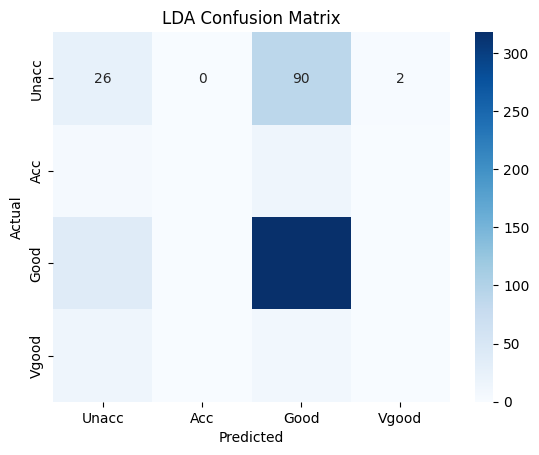

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("../data/raw/car_clean.csv")

# Separate X and y
X = df.drop("class", axis=1)
y = df["class"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Set empirical priors based on class distribution
priors = [0.222, 0.040, 0.700, 0.038]

# Initialize and train the model
lda = LinearDiscriminantAnalysis(priors=priors)
lda.fit(X_train, y_train)

# Predict on test data
y_pred = lda.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unacc', 'Acc', 'Good', 'Vgood'], yticklabels=['Unacc', 'Acc', 'Good', 'Vgood'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LDA Confusion Matrix')
plt.show()

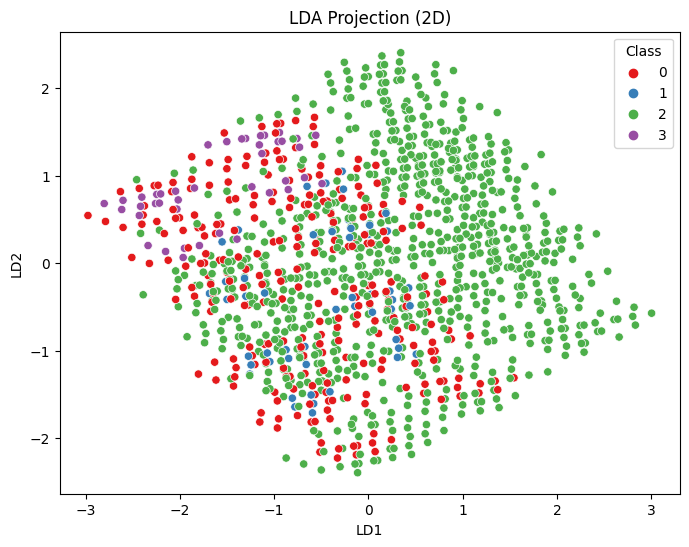

In [10]:
# Visualize LDA Components in 2D
import matplotlib.pyplot as plt
import seaborn as sns

# Project the training data into LDA components
X_lda = lda.transform(X_train)

# Visualize in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train, palette="Set1")
plt.title("LDA Projection (2D)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title="Class")
plt.show()

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.30      0.18      0.22       118
           1       0.00      0.00      0.00        19
           2       0.73      0.90      0.81       358
           3       0.14      0.04      0.06        24

    accuracy                           0.66       519
   macro avg       0.29      0.28      0.27       519
weighted avg       0.58      0.66      0.61       519



/Users/eddieh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eddieh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eddieh/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


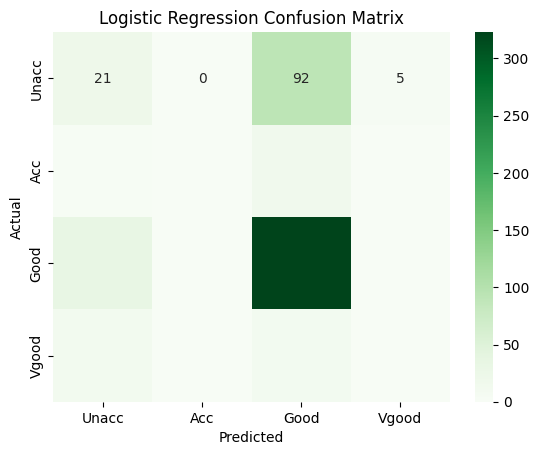

In [11]:
# Compare with a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

# Print classification report
print("Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(
    cm_logreg,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Unacc", "Acc", "Good", "Vgood"],
    yticklabels=["Unacc", "Acc", "Good", "Vgood"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [12]:
#Apply SMOTE after splitting your data, we only oversample the training data, not test data (to avoid data leakage)
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter

print("Before:", Counter(y_train))
print("After: ", Counter(y_train_resampled))

Before: Counter({2: 852, 0: 266, 1: 50, 3: 41})
After:  Counter({3: 852, 2: 852, 0: 852, 1: 852})


              precision    recall  f1-score   support

           0       0.27      0.22      0.24       118
           1       0.07      0.32      0.11        19
           2       0.88      0.62      0.73       358
           3       0.22      0.71      0.33        24

    accuracy                           0.52       519
   macro avg       0.36      0.47      0.35       519
weighted avg       0.68      0.52      0.58       519



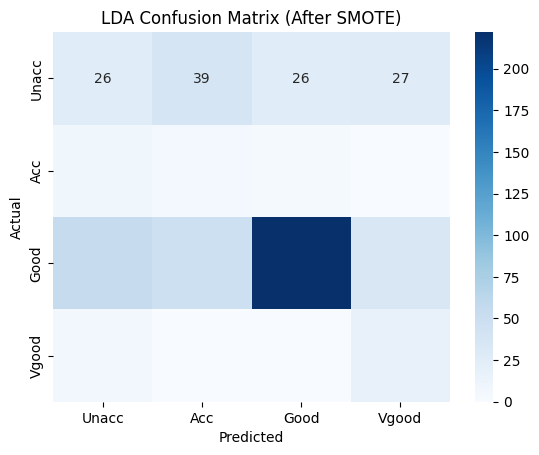

In [13]:
# retrain lda model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_resampled, y_train_resampled)
y_pred_lda = lda.predict(X_test)

print(classification_report(y_test, y_pred_lda))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Unacc", "Acc", "Good", "Vgood"],
    yticklabels=["Unacc", "Acc", "Good", "Vgood"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LDA Confusion Matrix (After SMOTE)")
plt.show()

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.26      0.26      0.26       118
           1       0.02      0.11      0.04        19
           2       0.87      0.62      0.72       358
           3       0.28      0.71      0.40        24

    accuracy                           0.52       519
   macro avg       0.36      0.42      0.36       519
weighted avg       0.67      0.52      0.58       519



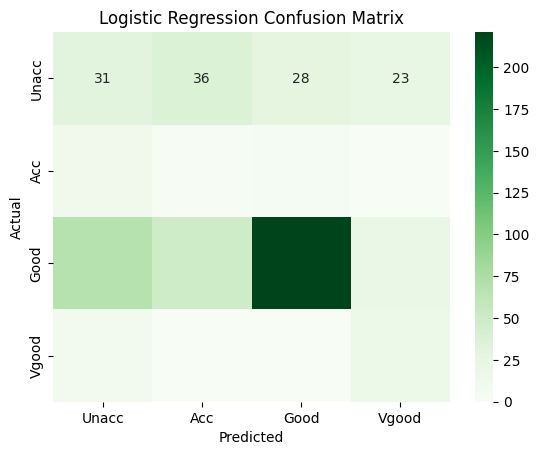

In [14]:
# retrain logistic model
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression - Classification Report:\n")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(
    cm_logreg,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Unacc", "Acc", "Good", "Vgood"],
    yticklabels=["Unacc", "Acc", "Good", "Vgood"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

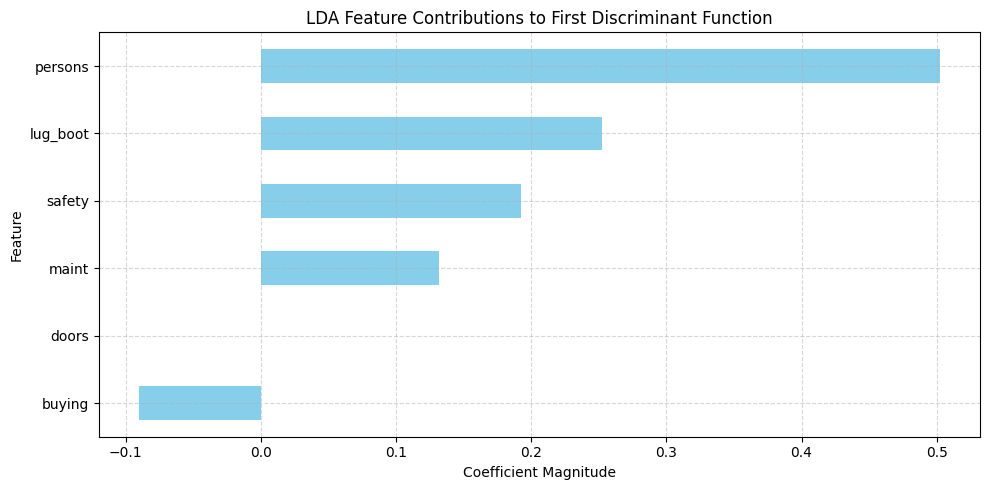

In [15]:
# Since LDA finds linear combinations of features that best separate the classes,
# the coefficients (or loadings) of those features tell us how influential they are in those discriminant directions.

import pandas as pd
import matplotlib.pyplot as plt

# Get coefficients from the trained LDA model
coefficients = lda.coef_[0]  # Each row corresponds to a class vs rest
feature_names = X.columns

# Make it a pandas Series for easy plotting
coef_series = pd.Series(coefficients, index=feature_names)

# Plot
plt.figure(figsize=(10, 5))
coef_series.sort_values().plot(kind="barh", color="skyblue")
plt.title("LDA Feature Contributions to First Discriminant Function")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()